# Taller de Manejo y Análisis de Datos
# Pauta Tarea 3 - Agregación limitada por difusión

**Profesores:** Pedro Montealegre (p.montealegre@uai.cl) y Roberto León (roberto.leonv@edu.uai.cl)

**Fecha de publicación:** miércoles 14 de septiembre.

**Fecha de entrega:** domingo 2 de octubre a las 23:59 vía webcursos.

# Introducción


La *agregación limitada por difusión* (DLA por sus siglas en inglés, “diffusion-limited aggregation”) es un proceso en el cual partículas sometidas a paseo aleatorio se aglomeran para formar agregados de tales partículas. 

Esta teoría, propuesta por Witten y Sander en 1981, es aplicable a la agregación de cualquier sistema donde la difusión es el medio primario de transporte en el sistema. DLA puede ser observado en muchos otros sistemas tales como eletrodeposición, flujo de Hele-Shaw, depósitos minerales, y ruptura de dieléctrico.


El proceso de DLA se puede simular computacionalmente del siguiente modo.
* Se comienza con una grilla de $n \times n$ celdas, con $n$ impar. Se comienza con todos las celdas "desocupadas" menos la central que se considera "ocupada". 
* Se escoge un punto al azar en el borde de la grilla y desde ahí comienza el recorrido de una partícula.
* El recorrido de una partícula consiste en una secuencia pasos conformados por movimientos aleatorios. En cada paso, se escoge una dirección (norte, sur, este, oeste) y la partícula se mueve en esa dirección. 
* Una partícula sigue su recorrido hasta que se sale de los márgenes de la grilla (en cuyo caso queda descartada) o llega a un sitio adyacente a uno ocupado. En el segundo caso la partícula se *congela* y desde ahí en adelante dicho sitio también queda ocupado. 
* Cuando una partícula se descarta o se congela, inmediatamente comienza el recorrido de una nueva partícula. 

En la siguiente imágen se representa un patrón obtenido a partir de este proceso, consistente en unas 33.000 partículas. Los colores el orden en que se han fijado las partículas
<img src="https://upload.wikimedia.org/wikipedia/commons/3/3d/Of7_p0001_15h.jpg" width="500">



# Actividad 1 - 4 punto

Escriba una función que reciba como argumento un entero positivo $p$, y que simule el modelo de Agregación Limitada por Difusión hasta que se ocupen $p$ sitios en una grilla de tamaño adecuado. La salida de la función es matriz de ceros y unos representando los sitios que quedaron ocupados. Su función además deberá generar una imágen simiar a la mostrada en la introducción. 

Debe cuidar que su implementación sea eficiente, de modo que se peuda generar un patrón de unas 100 partículas en cosa de segundos, y de al menos 1000 partículas en un par de minutos. Para esto, se sugiere trabajar con un tamaño de grilla dinámico, que sea un poco más grande que el cuadrado que contenga al patrón, y de este modo evitar que los paseos de las partículas se extiendan por muchas etapas. 

In [1]:
# Escriba aquí su respuesta
import numpy as np
import matplotlib.pyplot as plt

# Funcion que escoge al azar una nueva posición para una partícula que no se ha congelado
def mover(i,j):
    d = np.random.randint(4)
    if d==0:
        return (i+1,j)
    elif d==1:
        return (i-1,j)
    elif d==2:
        return (i,j+1)
    else:
        return (i,j-1)
    
# Funcion que inicializa una nueva particula en una posición al azar del cuadrado
def inicializar(n,radio):
    d = np.random.randint(4)
    if d==0: # Lado derecho
        j = np.random.randint(-radio,radio+1)
        return (n//2 + radio, n//2 + j)
    elif d==1: # Lado izquierdo
        j = np.random.randint(-radio,radio+1)
        return (n//2 - radio, n//2 + j)
    elif d==2: # Arriba
        i = np.random.randint(-radio,radio+1)
        return (n//2 + i, n//2 + radio)
    else: # Abajo
        i = np.random.randint(-radio,radio+1)
        return (n//2 + i, n//2 - radio)
    
# Función que calcula el máximo radio en el que se encuentra el patrón
def radio_max(A):
    n,m = A.shape
    for i in range(n//2):
        s1 = sum(sum(A[n//2-i:n//2+i+1,n//2-i:n//2+i+1]))
        s2 = sum(sum(A[n//2-i-1:n//2+i+2,n//2-i-1:n//2+i+2]))
        if s1 == s2:
            return i    
        
# Función que determina si una partícula es adjacente a una de parada.   
def parada(A,i,j):
    if A[i+1,j] != 0:
        return True
    if A[i-1,j] != 0:
        return True
    if A[i,j+1] != 0:
        return True
    if A[i,j-1] != 0:
        return True
    return False

# Función principal que simula el DLA
def DLA(p):
    n = 3*p+1
    r = 50
    A = np.zeros((n,n))
    A[n//2, n//2] = 2
    contador = 1
    while contador < p:
        
        radio = max(radio_max(A),50)
        (i,j) = inicializar(n,radio+r)
        moviendo = True
        
        while moviendo == True:
            
            i,j = mover(i,j)
            
            # Paramos si se sale de los bordes del subpatrón
            if  abs(n//2 - i) > radio + r or abs(n//2 - j) > radio + r:
                moviendo = False
            
            # O del borde máximo dado por n
            if  abs(n//2 - i) > n//2 or abs(n//2 - j) > n//2:
                moviendo = False
            
            # O si se determinó que debe parar por ser adyacente a otra partícula
            if parada(A,i,j):
                moviendo = False
                A[i,j] = 1+contador/p
                #print(contador, ",", end="")
                contador += 1
    radio = radio_max(A)            
    fig, ax = plt.subplots(figsize=(18, 10))           
    plt.imshow(A[n//2-radio-4:n//2 + radio +5,n//2-radio-4:n//2 + radio +5])
    plt.axis('off')            
    return A

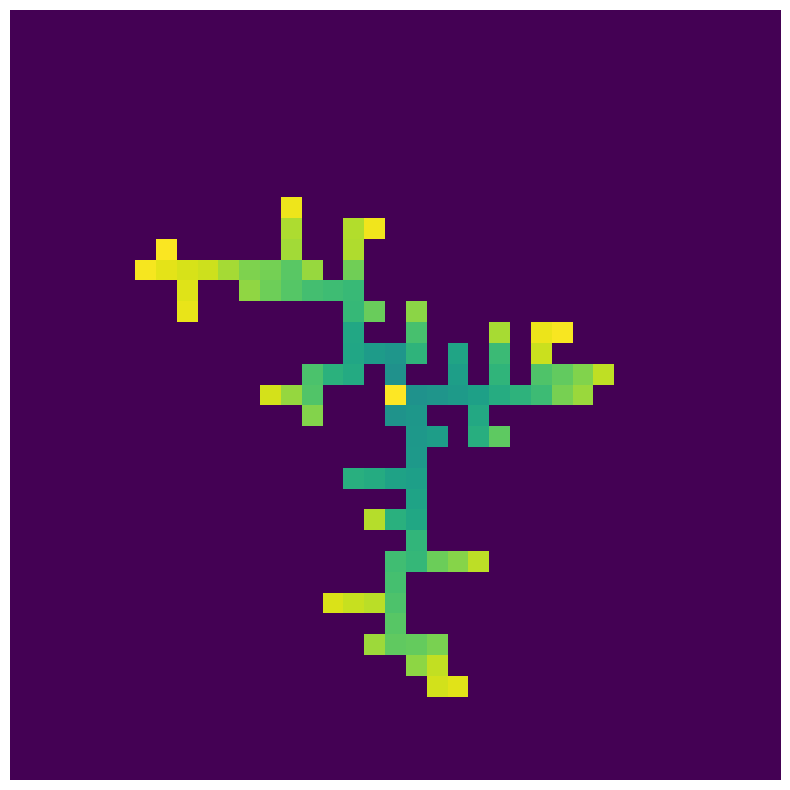

In [4]:
p = 100
B = DLA(p)

In [5]:
B

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Actividad 2 - 2 puntos

En geometría de fractales, la dimensión fractal $D$ es un número real que generaliza el concepto de dimensión ordinaria para objetos geométricos que no admiten espacio tangente. La dimensión fractal representa cuán completamente parece llenar un fractal el espacio conforme se amplía el primero hacia escalas más y más finas. 

En esta actividad buscaremos aproximar la dimensión fractal de un patrón dado. Para eso, utilice el método *caja de arena* descrito a continuación.

* Sea $r>0$ impar, se toma el conjunto $S(r)$ de celdas que forman un cuadrado de lado $r$ en el centro del patrón. 
* Mida el número $N(r)$ de stios ocupados en $S(r)$
* Grafique $N(r)$ en función de $r$ en escala log-log
* Usando el método de mínimos cuadrados, calcule la pendiente de la recta que mejor describa el crecimiento. La dimensión fractal del sistema será el valor de dicha pendiente. 

Escriba una función llamada **sandbox** que reciba como argumento una matriz cuadrada $A$ (representando un patrón) y devuelva una aproximación de la dimensión fractal del patrón representado en $A$. Su función además deberá generar un gráfico en que se represente $N(r)$ en función de $r$ en escala log-log y la recta de minimos cuadrados. 

1.5255017338417527

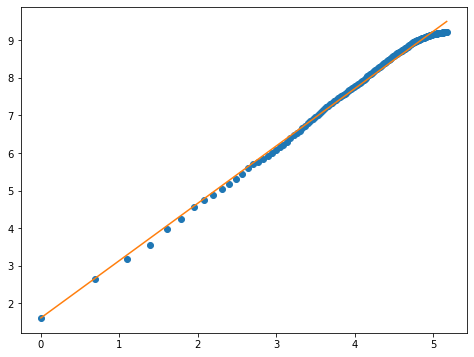

In [51]:
# Escriba aquí su respuesta

def sandbox(A):
    n,m = A.shape
    r = radio_max(A)
    lista = []
    for i in range(1,r):
        Suma = sum(sum(np.array( A[n//2-i:n//2+i+1,n//2-i:n//2+i+1] != 0, dtype = int)))
        lista.append(Suma)
    
    arreglo = np.array(lista)    
    
    a = np.polyfit(np.log(np.arange(1,r)),np.log(arreglo),1)
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(np.log(range(1,r)),np.log(arreglo),"o")
    ax.plot(np.log(range(1,r)), np.polyval(a,np.log(range(1,r))))
    return a[0]

sandbox(B)










## Indicaciones

* Su entrega deberá consistir en una versión de este archivo Jupyter editado en el campo indicados anteriormente. 
* Es de su responsabilidad entregar el archivo en el formato indicado.  
* No se puede modificar las bases de datos entregadas. Es decir, su programa debe funcionar con los archivos tal cual se publicaron en webcursos.
* El código debe ser ordenado y comentado adecuadamente. Las variables deben tener nombres que representen su uso.
* La entrega es vía webcursos, solo hasta la fecha indicada al comienzo. No se aceptan tareas atrasadas.

## Recomendaciones:
* Antes de entregar vaya a `Kernel -> Restart & Clear Output` y luego ejecute nuevamente los bloques asegurándose que ninguno arroje errores.